## Metropolis–Hastings algorithm

The metropolis-Hastings algorithm is a typical algorithm that generates the samples for an arbitrary density function (i.e., target density function). It uses the proposal density (i.e., transition kernel) to generate the next sample candidate. The candidate is accepted with the acceptance ratio calculated by the target density function.

**Notes**

The proposal density function $Q$ should satisfies the symmetry property, i.e., $Q(x|y)==Q(y|x)$. A usual choice of the proposal density function $Q$ is Gaussian/normal distribution or uniform distribution.


In [1]:
# Import auxiliary libraries for demonstration

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.rcParams[ "figure.figsize" ] = [ 5, 4 ]

plt.rcParams[ "figure.dpi" ] = 80
plt.rcParams[ "font.family" ] = "Times New Roman"
plt.rcParams[ "font.size" ] = '14'

### Metropolis–Hastings sampler

Class `MetropolisHastingsSampler` implements the Metropolis-Hastings sampler.

Based on the algorithm, three input parameters, namely `initialVal`, `targetPdf`, `proposalCSampler` are required to create a Metropolis-Hastings sampler. 

`initialVal` is the first observed data point that is used to start the sampling procedure. 

`targetPdf` is a target density function that returns the probability for a given value. It should be noted that the `targetPdf` function can be proportional to the target density function up to a multiplicative constant. 

`proposalCSampler` is a sampler that can return a sample for a given observation. For example, for a given observation $x_t$, the sampler can be $x_{t+1} \sim \mathcal{N}(x_t, 1)$ and it can return a sample based on the current observation $x_t$.

The following examples show the application of the Metropolis-Hastings sampler for exponential-like and lognormal-like target distribution.

#### Class initialization help

In [2]:
from ffpack.rpm import MetropolisHastingsSampler
help( MetropolisHastingsSampler.__init__ )

Help on function __init__ in module ffpack.rpm.metropolisHastings:

__init__(self, initialVal=None, targetPdf=None, proposalCSampler=None, sampleDomain=None, **sdKwargs)
    Initialize the Metropolis-Hastings sampler
    
    Parameters
    ----------
    initialVal: scalar or array_like
        Initial observed data point.
    targetPdf: function
        Target probability density function or target distribution function.
        targetPdf takes one input parameter and return the corresponding 
        probability. It will be called as targetPdf( X ) where X is the same 
        type as initialVal, and a scalar value of probability should be returned.
    proposalCSampler: function
        Proposal conditional sampler (i.e., transition kernel). proposalCSampler 
        is a sampler that will return a sample for the given observed data point. 
        A usual choice is to let proposalCSampler be a Gaussian/normal 
        distribution centered at the observed data point. It will be ca

#### Example with exponential-like distribution

In [3]:
# Set random seed for repeatable results
from ffpack.config import globalConfig
globalConfig.setSeed( 0 )

mhsInitialVal = 1.0


# def mhsTargetPdf( x ):
#     return 0 if x < 0 else np.exp( -x )

# We can also use lambda function
mhsTargetPdf = lambda x : 0 if x < 0 else np.exp( -x )

# def mhsProposalCSampler( x ):
#     return np.random.normal( x, 1 )

# We can also use lambda function
mhsProposalCSampler = lambda x : np.random.normal( x, 1 )

In [4]:
mhSampler = MetropolisHastingsSampler( initialVal=mhsInitialVal, 
                                       targetPdf=mhsTargetPdf, 
                                       proposalCSampler=mhsProposalCSampler )

In [5]:
mhsResults = np.zeros( 10000 )
for i in range( 10000 ):
    mhsResults[ i ] = mhSampler.getSample()

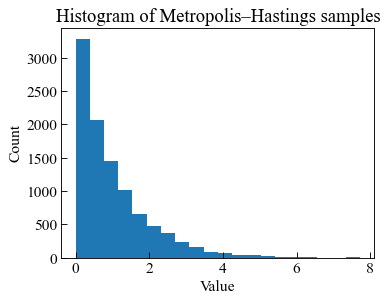

In [6]:
fig, ax = plt.subplots()

ax.hist( np.array( mhsResults ), bins=20 )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "Count" )
ax.set_xlabel( "Value" )
ax.set_title( "Histogram of Metropolis–Hastings samples" )

plt.tight_layout()
plt.show()

#### Example with lognormal-like distribution

In [7]:
# Set random seed for repeatable results
from ffpack.config import globalConfig
globalConfig.setSeed( 0 )

mhsInitialVal = 1.0

def mhsTargetPdf( x ):
    return 0 if x < 0 else 1 / x * np.exp( -1 * np.power( np.log( x ), 2 ) )

def mhsProposalCSampler( x ):
    return np.random.normal( x, 1 )

In [8]:
mhSampler = MetropolisHastingsSampler( initialVal=mhsInitialVal, 
                                       targetPdf=mhsTargetPdf, 
                                       proposalCSampler=mhsProposalCSampler )

In [9]:
mhsResults = np.zeros( 10000 )
for i in range( 10000 ):
    mhsResults[ i ] = mhSampler.getSample()

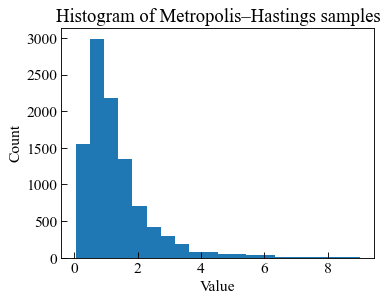

In [10]:
fig, ax = plt.subplots()

ax.hist( np.array( mhsResults ), bins=20 )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "Count" )
ax.set_xlabel( "Value" )
ax.set_title( "Histogram of Metropolis–Hastings samples" )

plt.tight_layout()
plt.show()

### Au modified Metropolis–Hastings sampler

Class `AuModifiedMHSampler` implements the Metropolis-Hastings sampler.

The modified Metropolis-Hastings sampling algorithm proposed by Au and Beck samples data point at each dimension.

Reference: 

* Au, S.K. and Beck, J.L., 2001. Estimation of small failure probabilities in high dimensions by subset simulation. Probabilistic engineering mechanics, 16(4), pp.263-277.

#### Class initialization help

In [11]:
from ffpack.rpm import AuModifiedMHSampler
help( AuModifiedMHSampler.__init__ )

Help on function __init__ in module ffpack.rpm.metropolisHastings:

__init__(self, initialVal=None, targetPdf=None, proposalCSampler=None, sampleDomain=None, **sdKwargs)
    Initialize the Au modified Metropolis-Hastings sampler
    
    Parameters
    ----------
    initialVal: array_like
        Initial observed data point.
    targetPdf: function list
        Target probability density function list. Each element targetPdf[ i ] in 
        the list is a callable function referring the independent marginal.
        targetPdf[ i ] takes one input parameter and return the corresponding 
        probability. It will be called as targetPdf[ i ]( X[ i ] ) where X is a 
        list in which the element is same type as initialVal[ i ], and a scalar 
        value of probability should be returned by targetPdf[ i ]( X[ i ] ).
    proposalCSampler: function list
        Proposal conditional sampler list (i.e., transition kernel list). Each 
        element proposalCSampler[ i ] in the list i

#### Example with exponential-like distribution

In [12]:
# Set random seed for repeatable results
from ffpack.config import globalConfig
globalConfig.setSeed( 0 )

aumhsInitialVal = [ 1.0, 1.0 ]


def autpdf( x ):
    return 0 if x < 0 else np.exp( -x )

aumhsTargetPdf = [ autpdf, autpdf ]

# We use normal distribution as proposal distribution
def aupcs( x ):
    return np.random.normal( x, 1 )

aumhsProposalCSampler = [ aupcs, aupcs ]

In [13]:
aumhSampler = AuModifiedMHSampler( initialVal=aumhsInitialVal, 
                                   targetPdf=aumhsTargetPdf, 
                                   proposalCSampler=aumhsProposalCSampler )

In [14]:
aumhsResults = np.zeros( [ 10000, 2 ] )
for i in range( 10000 ):
    aumhsResults[ i ] = aumhSampler.getSample()

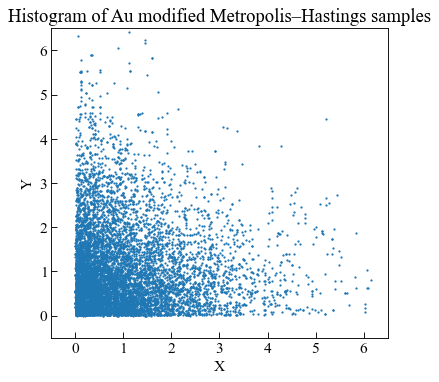

In [15]:
fig, ax = plt.subplots( figsize=( 5, 5 ) )

ax.plot( aumhsResults[ :, 0], aumhsResults[ :, 1 ], ".", markersize=2 )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "Y" )
ax.set_xlabel( "X" )
ax.set_title( "Histogram of Au modified Metropolis–Hastings samples" )
ax.set_xlim( [ -0.5, 6.5 ] )
ax.set_ylim( [ -0.5, 6.5 ] )

plt.tight_layout()
plt.show()

#### Example with lognormal-like distribution

In [16]:
# Set random seed for repeatable results
from ffpack.config import globalConfig
globalConfig.setSeed( 0 )

aumhsInitialVal = [ 1.0, 1.0 ]

def autpdf( x ):
    return 0 if x < 0 else 1 / x * np.exp( -1 * np.power( np.log( x ), 2 ) )

aumhsTargetPdf = [ autpdf, autpdf ]

# We use uniform distribution as proposal distribution
def aupcs( x ):
    return np.random.uniform( x-0.5, x+0.5 )

aumhsProposalCSampler = [ aupcs, aupcs ]

In [17]:
aumhSampler = AuModifiedMHSampler( initialVal=aumhsInitialVal, 
                                   targetPdf=aumhsTargetPdf, 
                                   proposalCSampler=aumhsProposalCSampler )

In [18]:
aumhsResults = np.zeros( [ 10000, 2 ] )
for i in range( 10000 ):
    aumhsResults[ i ] = aumhSampler.getSample()

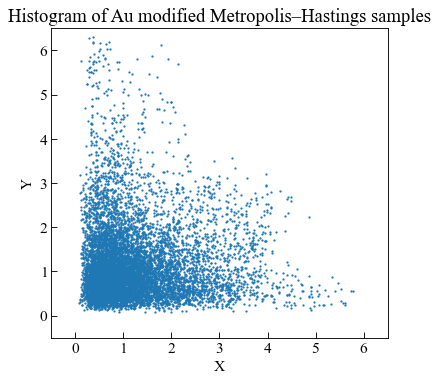

In [19]:
fig, ax = plt.subplots( figsize=( 5, 5 ) )

ax.plot( aumhsResults[ :, 0], aumhsResults[ :, 1 ], ".", markersize=2 )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "Y" )
ax.set_xlabel( "X" )
ax.set_title( "Histogram of Au modified Metropolis–Hastings samples" )
ax.set_xlim( [ -0.5, 6.5 ] )
ax.set_ylim( [ -0.5, 6.5 ] )

plt.tight_layout()
plt.show()